In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Cargar los datasets
train_df = pd.read_csv("train.csv")
val_df   = pd.read_csv("val.csv")
test_df  = pd.read_csv("test.csv")

# Explorar el número de registros
print("Número de registros en Train:", len(train_df))
print("Número de registros en Validation:", len(val_df))
print("Número de registros en Test:", len(test_df))

# Revisar datasets
print("Columnas del dataset:", train_df.columns.tolist())
print("\nEjemplo de Train:\n", train_df.head())

Número de registros en Train: 3334
Número de registros en Validation: 3333
Número de registros en Test: 3333
Columnas del dataset: ['filename', 'Classes', 'Labels']

Ejemplo de Train:
       filename  Classes  Labels
0  1025794.jpg  707-320       0
1  1340192.jpg  707-320       0
2  0056978.jpg  707-320       0
3  0698580.jpg  707-320       0
4  0450014.jpg  707-320       0


In [12]:
# Clases únicas
num_clases = train_df['Labels'].nunique()
print("Número de clases únicas en el dataset:", num_clases)

Número de clases únicas en el dataset: 100


In [13]:
# Distribución de las clases 
train_counts = train_df['Labels'].value_counts().sort_index()
val_counts   = val_df['Labels'].value_counts().sort_index()
test_counts  = test_df['Labels'].value_counts().sort_index()

print("Distribución en Train:\n", train_counts)
print("\nDistribución en Validation:\n", val_counts)
print("\nDistribución en Test:\n", test_counts)

Distribución en Train:
 Labels
0     34
1     33
2     33
3     34
4     33
      ..
95    33
96    34
97    33
98    33
99    34
Name: count, Length: 100, dtype: int64

Distribución en Validation:
 Labels
0     33
1     34
2     33
3     33
4     34
      ..
95    33
96    33
97    34
98    33
99    33
Name: count, Length: 100, dtype: int64

Distribución en Test:
 Labels
0     33
1     33
2     34
3     33
4     33
      ..
95    34
96    33
97    33
98    34
99    33
Name: count, Length: 100, dtype: int64


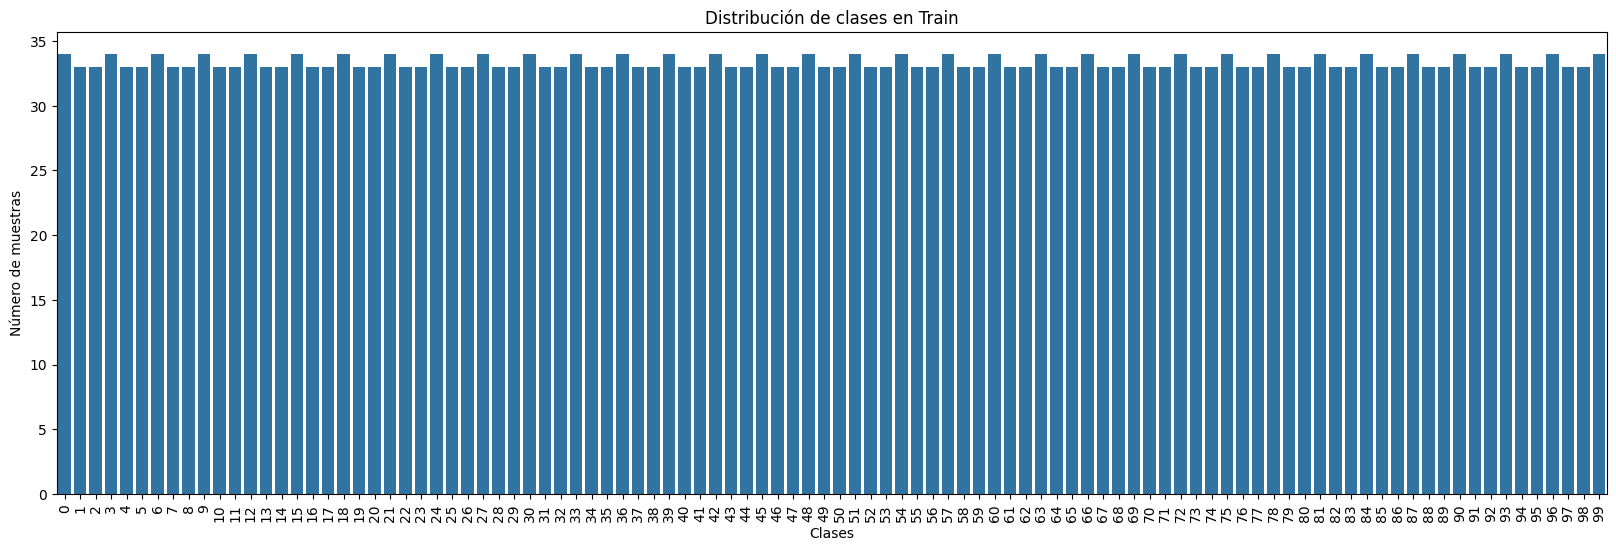

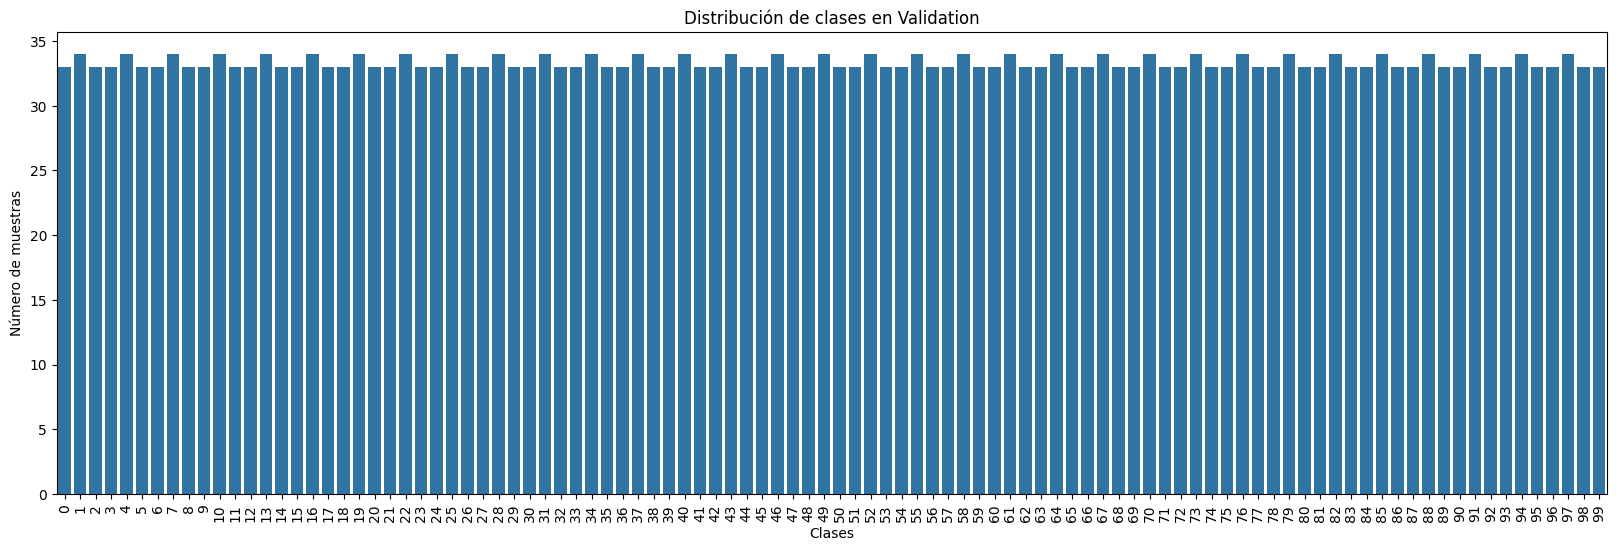

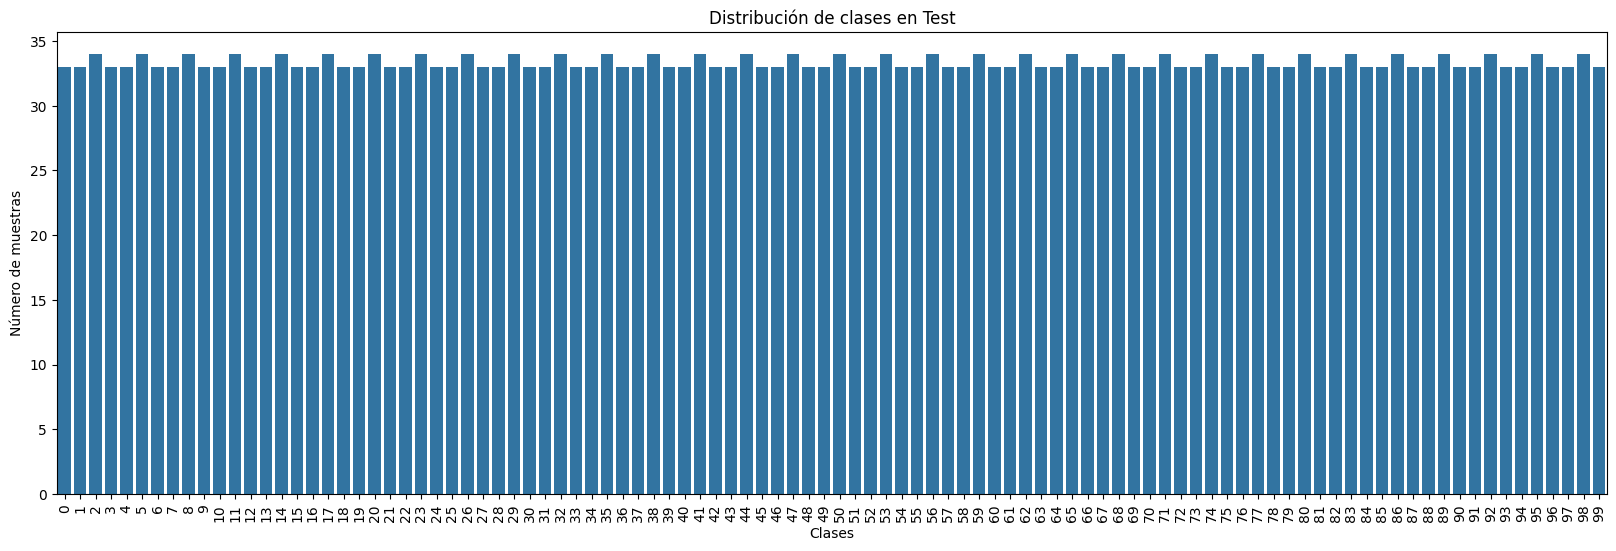

In [14]:
def plot_distribution(counts, title):
    plt.figure(figsize=(20,6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(title)
    plt.xlabel("Clases")
    plt.ylabel("Número de muestras")
    plt.xticks(rotation=90)
    plt.show()

# Plot Train
plot_distribution(train_counts, "Distribución de clases en Train")

# Plot Validation
plot_distribution(val_counts, "Distribución de clases en Validation")

# Plot Test
plot_distribution(test_counts, "Distribución de clases en Test")

### Approach: 70% Train, 20% Test, 10% Val

In [15]:
# Cargar los datasets
new_train_df = pd.read_csv("new_train.csv")
new_val_df   = pd.read_csv("new_val.csv")
new_test_df  = pd.read_csv("new_test.csv")

# Explorar el número de registros
print("Número de registros en Train:", len(new_train_df))
print("Número de registros en Test:", len(new_test_df))
print("Número de registros en Validation:", len(new_val_df))

Número de registros en Train: 7000
Número de registros en Test: 2000
Número de registros en Validation: 1000


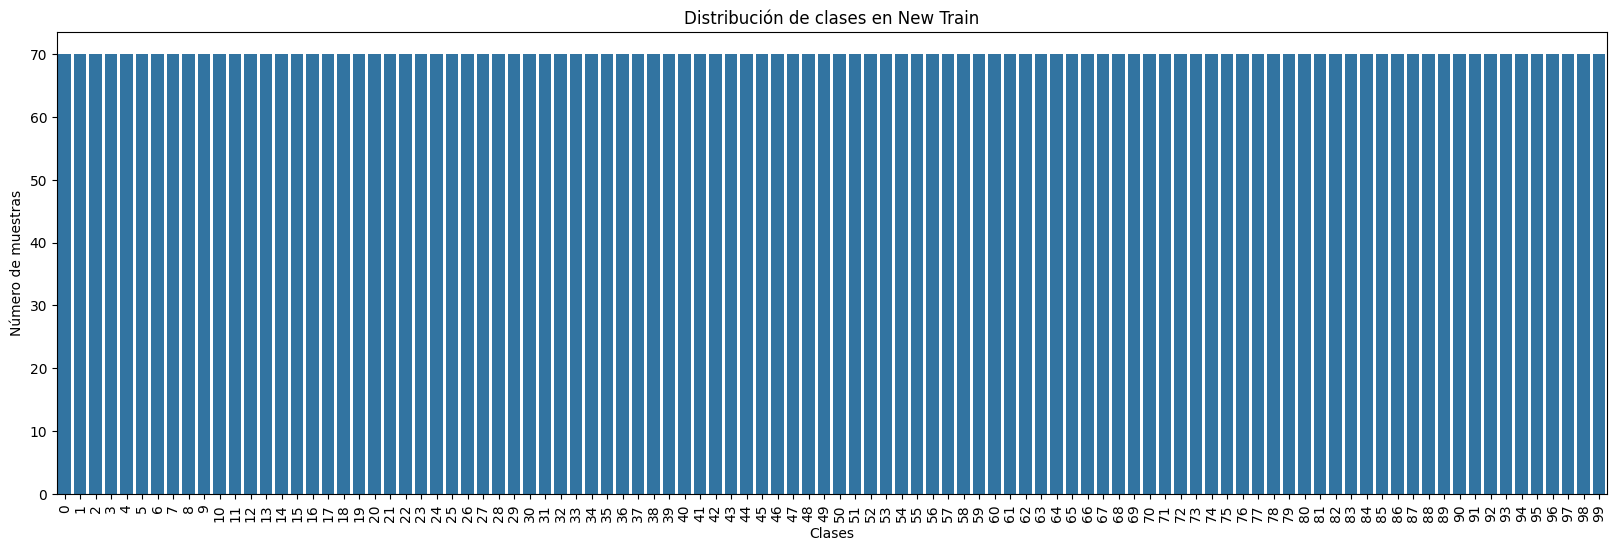

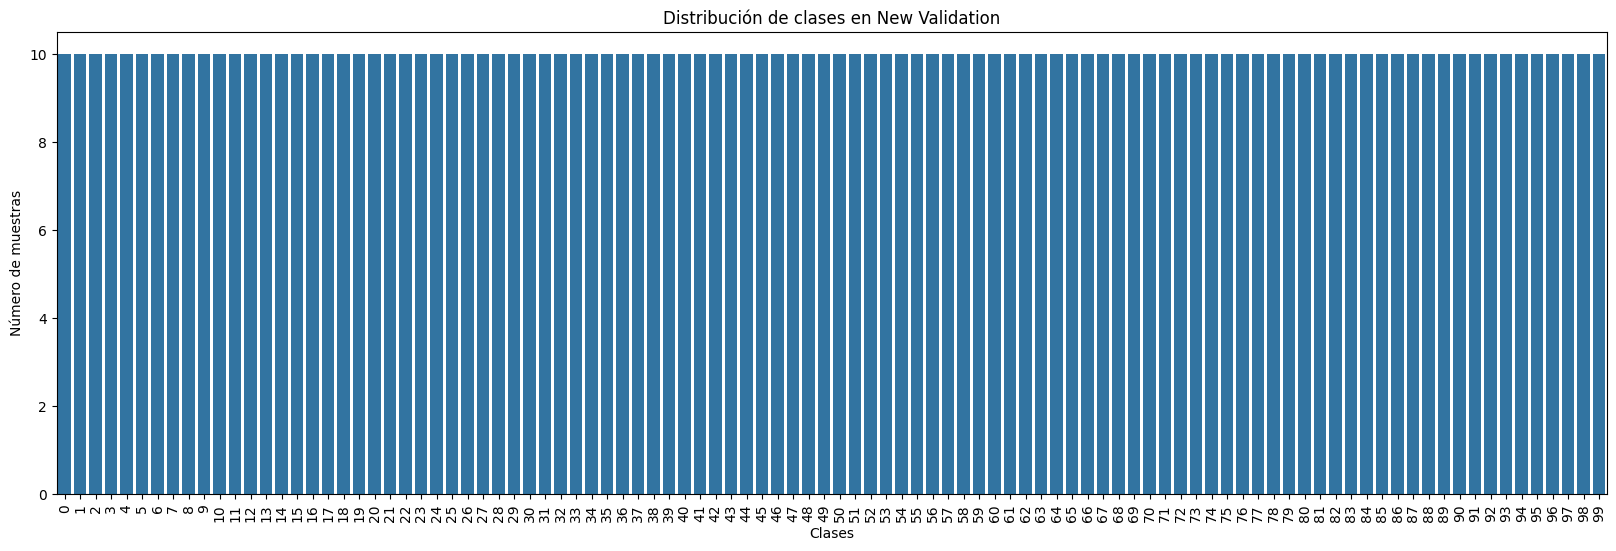

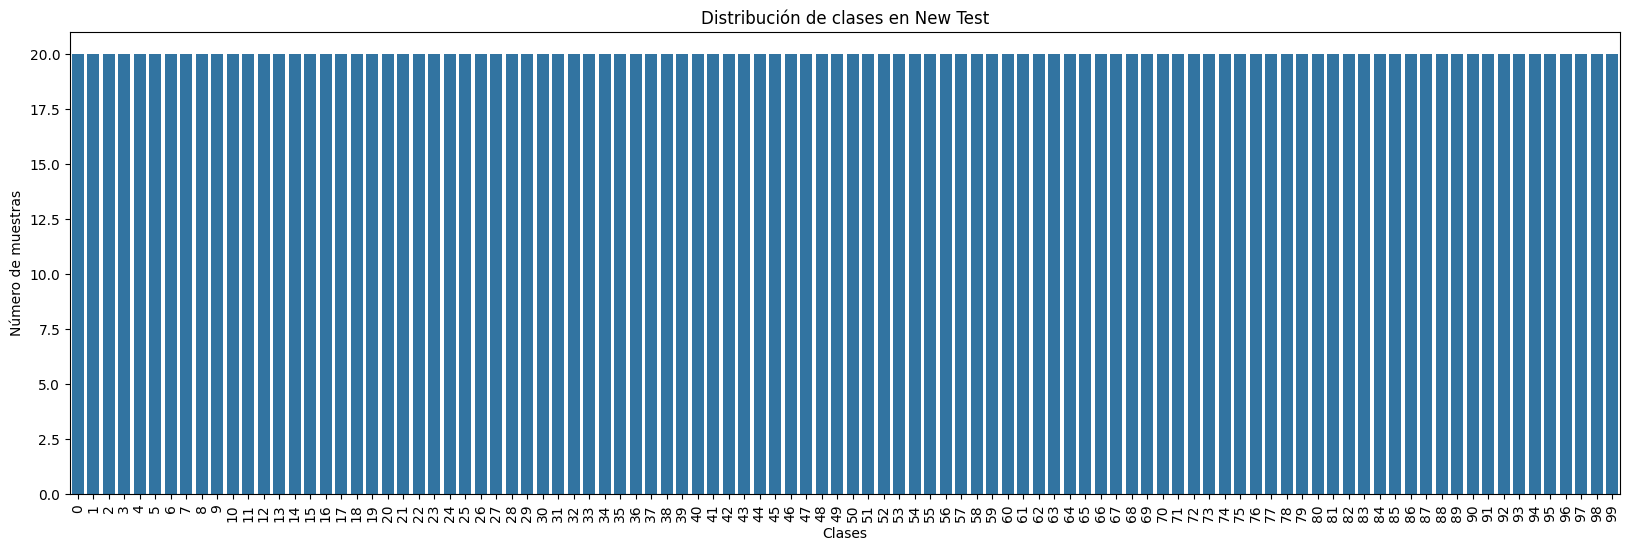

In [16]:
train_counts = new_train_df['Labels'].value_counts().sort_index()
val_counts   = new_val_df['Labels'].value_counts().sort_index()
test_counts  = new_test_df['Labels'].value_counts().sort_index()

# Plot Train
plot_distribution(train_counts, "Distribución de clases en New Train")

# Plot Validation
plot_distribution(val_counts, "Distribución de clases en New Validation")

# Plot Test
plot_distribution(test_counts, "Distribución de clases en New Test")

## 📊 Métricas - Modelo Resnet18

In [18]:
# Recargar el entorno IPython para recargar automáticamente los módulos
%load_ext autoreload
%autoreload 2

import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


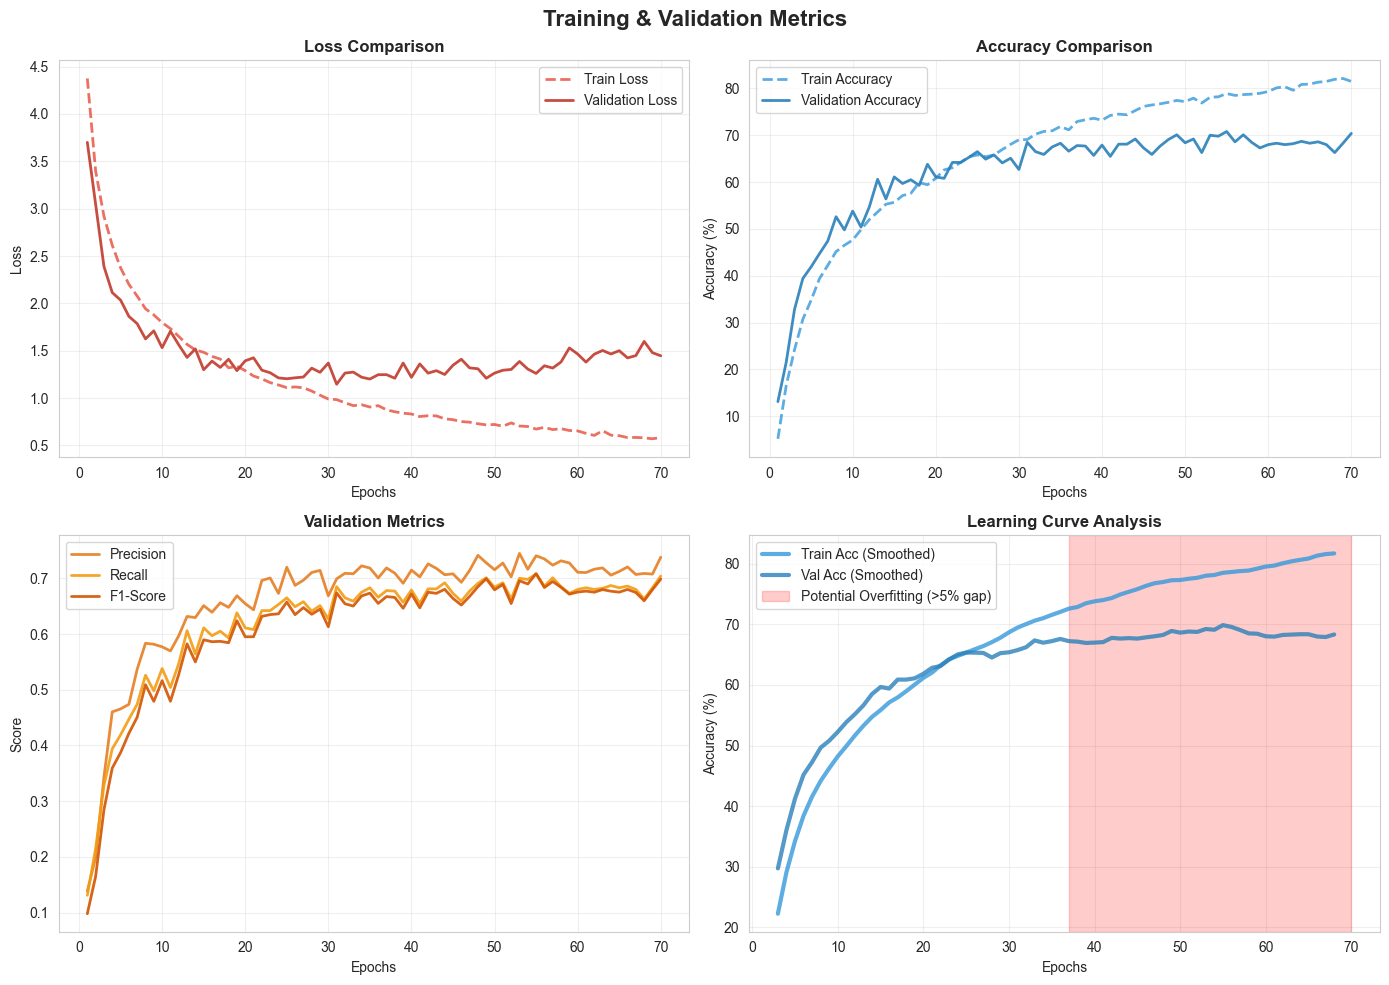

In [ ]:

history_resnet18 = utils.load_training_history("model_resnet18/training_history_resnet18.json")
utils.plot_training_metrics(history_resnet18)

### Interpretación - RestNet 18

##### 🔹 Pérdida (Loss)
- La **pérdida de entrenamiento** y **validación** disminuyen al inicio.
- Desde aproximadamente **epoch 25**, la pérdida de validación se estanca mientras la de entrenamiento sigue bajando.
- Esto sugiere un posible **sobreajuste** (overfitting).

##### 🔹 Exactitud (Accuracy)
- La **exactitud de entrenamiento** sigue aumentando hasta superar el **80%**.
- La **exactitud de validación** se estabiliza alrededor del **70%**.
- El **gap creciente** entre ambas indica pérdida de generalización.

##### 🔹 Métricas de Validación (Validation Metrics)
- **Precision**, **recall** y **F1-score** se estabilizan cerca de **0.7**.
- No hay mejoras significativas después de ~epoch 30.

##### 🔹 Curva de Aprendizaje
- El área sombreada en rojo muestra una zona de **sobreajuste evidente desde el epoch 40**.
- El gap entre exactitud de entrenamiento y validación supera el **5%**.


#### ✅ Conclusión

El modelo **aprende bien al inicio**, pero a partir de ~epoch **35–40** comienza a **sobreajustarse**, es decir, memoriza el set de entrenamiento y pierde capacidad de generalización.

#### 🛠️ Posibles Mejoras
- Aplicar **early stopping** (~epoch 35)
- Ajustar más la configuración de **regularización** como `Dropout` o `Weight Decay`
- Aplicar más variaciones de **data augmentation** para mejorar la robustez

## 📊 Métricas - Modelo Resnet50

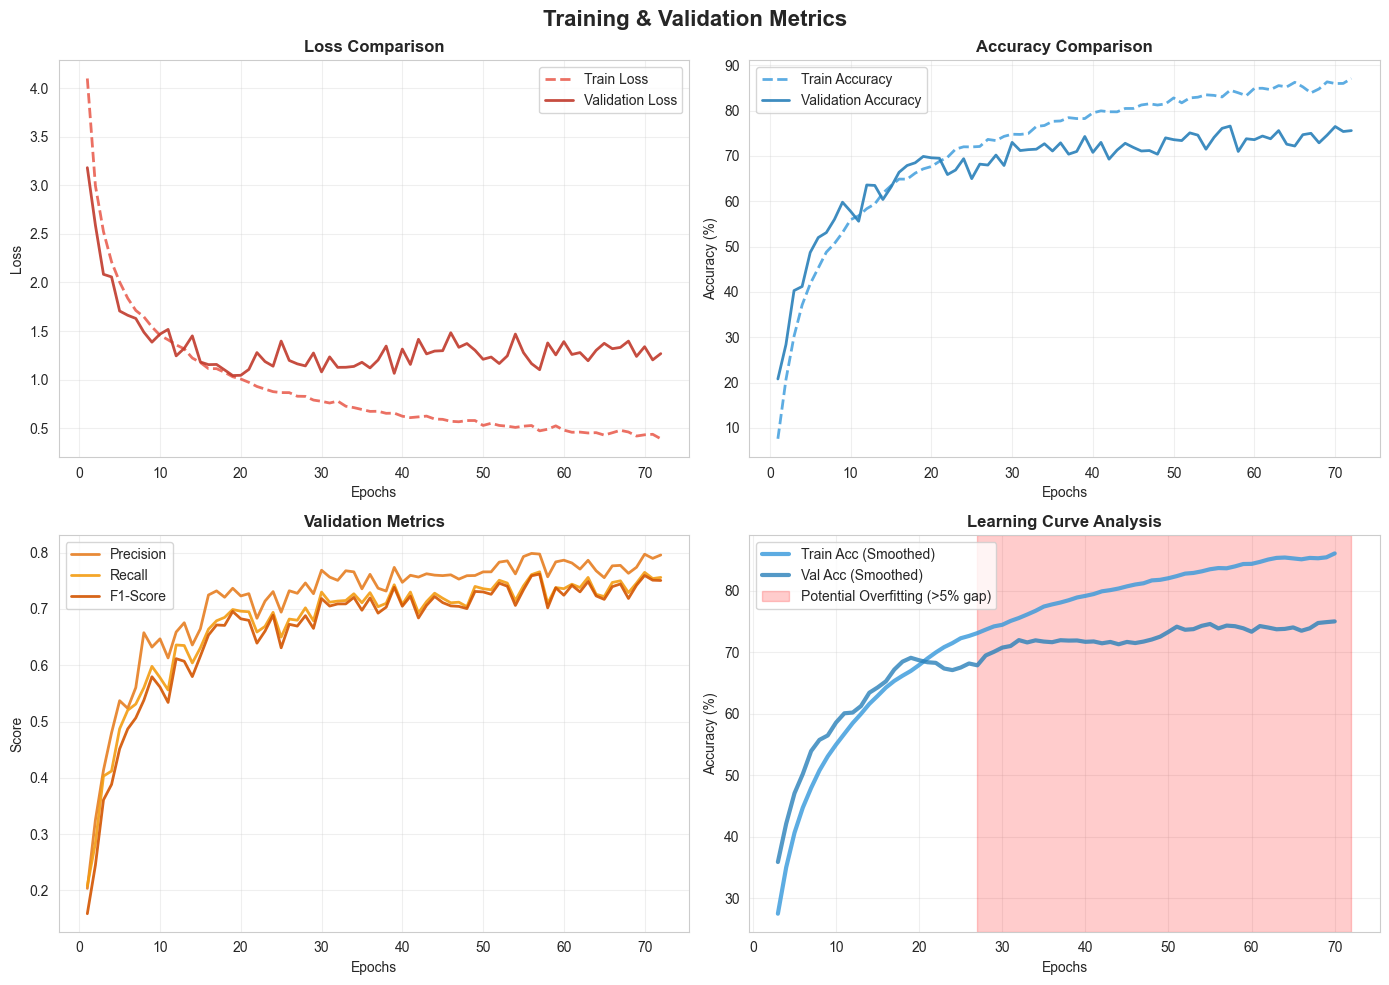

In [25]:
history_resnet50 = utils.load_training_history("model_resnet50/training_history_resnet50.json")
utils.plot_training_metrics(history_resnet50)

### 📊 Interpretación - ResNet50 

#### 🔹 Pérdida (Loss)
- La pérdida de entrenamiento disminuye de forma constante hasta ~0.4.
- La pérdida de validación baja rápidamente al inicio, pero se **estanca alrededor de 1.0** después del epoch 20, con variaciones notables.
- A partir de epoch 30–35 se observa una **divergencia clara entre training y validation loss**.

#### 🔹 Exactitud (Accuracy)
- La exactitud de entrenamiento sube progresivamente hasta cerca del **87%**.
- La exactitud de validación se estabiliza en torno al **74%** y **ya no mejora** después de epoch ~30.
- Se observa un **gap creciente entre entrenamiento y validación**, característico de sobreajuste.

#### 🔹 Métricas de Validación
- **Precision**, **recall** y **F1-score** aumentan de forma consistente hasta el epoch 30–35 y luego se estabilizan entre **0.72 y 0.78**.
- No hay deterioro, pero tampoco mejora en la segunda mitad del entrenamiento.

#### 🔹 Curva de Aprendizaje (Smoothed)
- Desde el **epoch 30**, la diferencia entre `Train Accuracy` y `Val Accuracy` supera el **5%**, lo cual se marca como zona de **overfitting potencial**.
- El modelo sigue aprendiendo el set de entrenamiento, pero **no mejora en validación**, lo cual sugiere pérdida de capacidad de generalización.


### ✅ Conclusión

Este entrenamiento con **ResNet50** muestra un claro caso de **sobreajuste a partir del epoch 30**:

- El modelo, al tener mayor capacidad que ResNet18, logra un entrenamiento más preciso.
- Sin embargo, **no generaliza mejor al conjunto de validación** y termina sobreajustando.

#### 🛠️ Posibles Mejoras
- Ajustar el **early stopping** para que se detenga antes (epoch 30–35).
- Similar a RestNet18, ajustar las **técnicas de regularización** (`Dropout`, `Weight Decay`).
- Incrementar el uso de **data augmentation**.

## 📊 Métricas - Modelo Resnet101

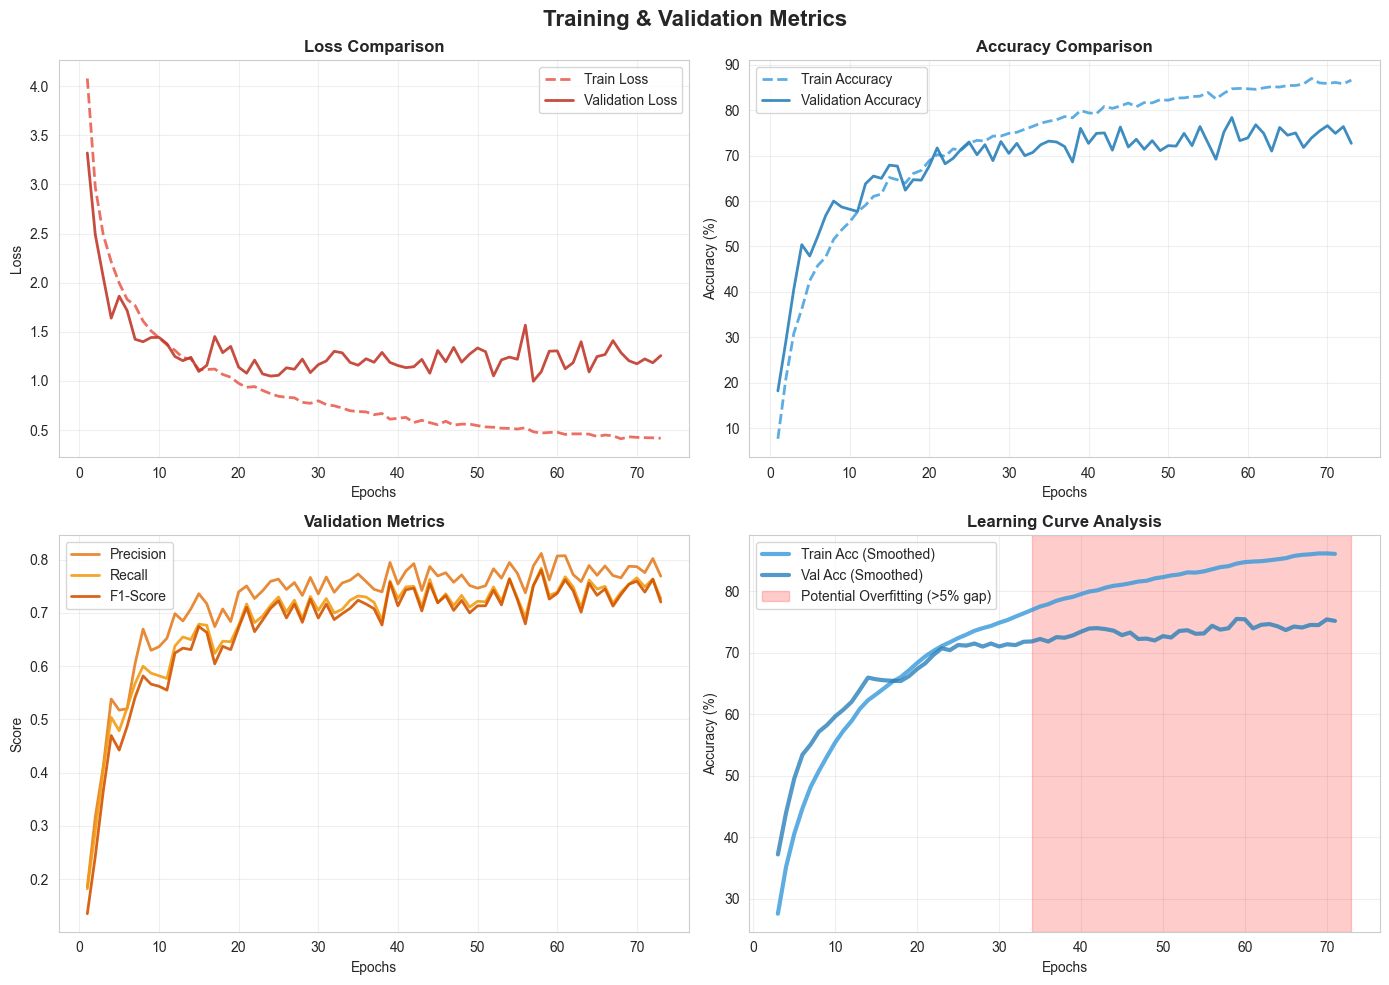

In [26]:
history_resnet101 = utils.load_training_history("model_resnet101/training_history_resnet101.json")
utils.plot_training_metrics(history_resnet101)

## 📊 Interpretacion - ResNet101

#### 🔹 Pérdida (Loss)
- La pérdida de entrenamiento disminuye de forma constante hasta llegar a valores por debajo de 0.5.
- La pérdida de validación desciende inicialmente, pero se **estanca cerca de 1.1 a partir del epoch 20**.
- A partir de la epoch 40, la pérdida de validación comienza a mostrar **fluctuaciones significativas**, lo cual es típico de **overfitting**.

#### 🔹 Exactitud (Accuracy)
- La exactitud de entrenamiento progresa bien, alcanzando cerca del **85–87%**.
- La exactitud de validación se estabiliza alrededor del **74–75%**, sin mejoras sustanciales después del epoch 30.
- Se observa un **gap creciente** entre entrenamiento y validación, especialmente marcado desde epoch 35.

#### 🔹 Métricas de Validación
- **Precision**, **recall** y **F1-score** mejoran hasta ~epoch 30–35, estabilizándose luego en un rango entre **0.74 y 0.79**.
- Las curvas son estables, lo que indica **consistencia en la evaluación**, aunque ya no hay ganancia adicional más allá de ese punto.

#### 🔹 Curva de Aprendizaje (Smoothed)
- El área roja indica que desde el **epoch 34** se supera el umbral del **5% de gap entre `train_acc` y `val_acc`**.
- Desde entonces, el modelo sigue mejorando en entrenamiento, pero **ya no mejora en validación**, confirmando un patrón clásico de **sobreajuste**.


### ✅ Conclusión

Este entrenamiento con **ResNet101**, aunque exitoso en aprendizaje del conjunto de entrenamiento, muestra un **overfitting claro a partir del epoch 34–35**. Dado que se está trabajando con un dataset grande (~100k), el modelo tiene la capacidad de memorizar sin necesariamente generalizar mejor.

**ResNet101 tiene mayor capacidad que ResNet50 o ResNet18**, pero sin un conjunto de validación más complejo o regularización adicional, esa capacidad puede resultar en sobreajuste.
Aun así, los **scores de validación son sólidos (~75% accuracy y ~0.78 F1-score)**, lo que indica que el modelo tiene buen desempeño general.

#### 🛠️ Posibles mejoras
- Ajustar el **early stopping** para que se detenga antes (epoch 34–38).
- Considerar:
  - Aumentar **data augmentation**.
  - Aplicar **Dropout** en capas finales.
  - Usar **label smoothing** o aumentar el **peso de regularización (weight decay)**.

## 📊 Métricas - Modelo ConvNext

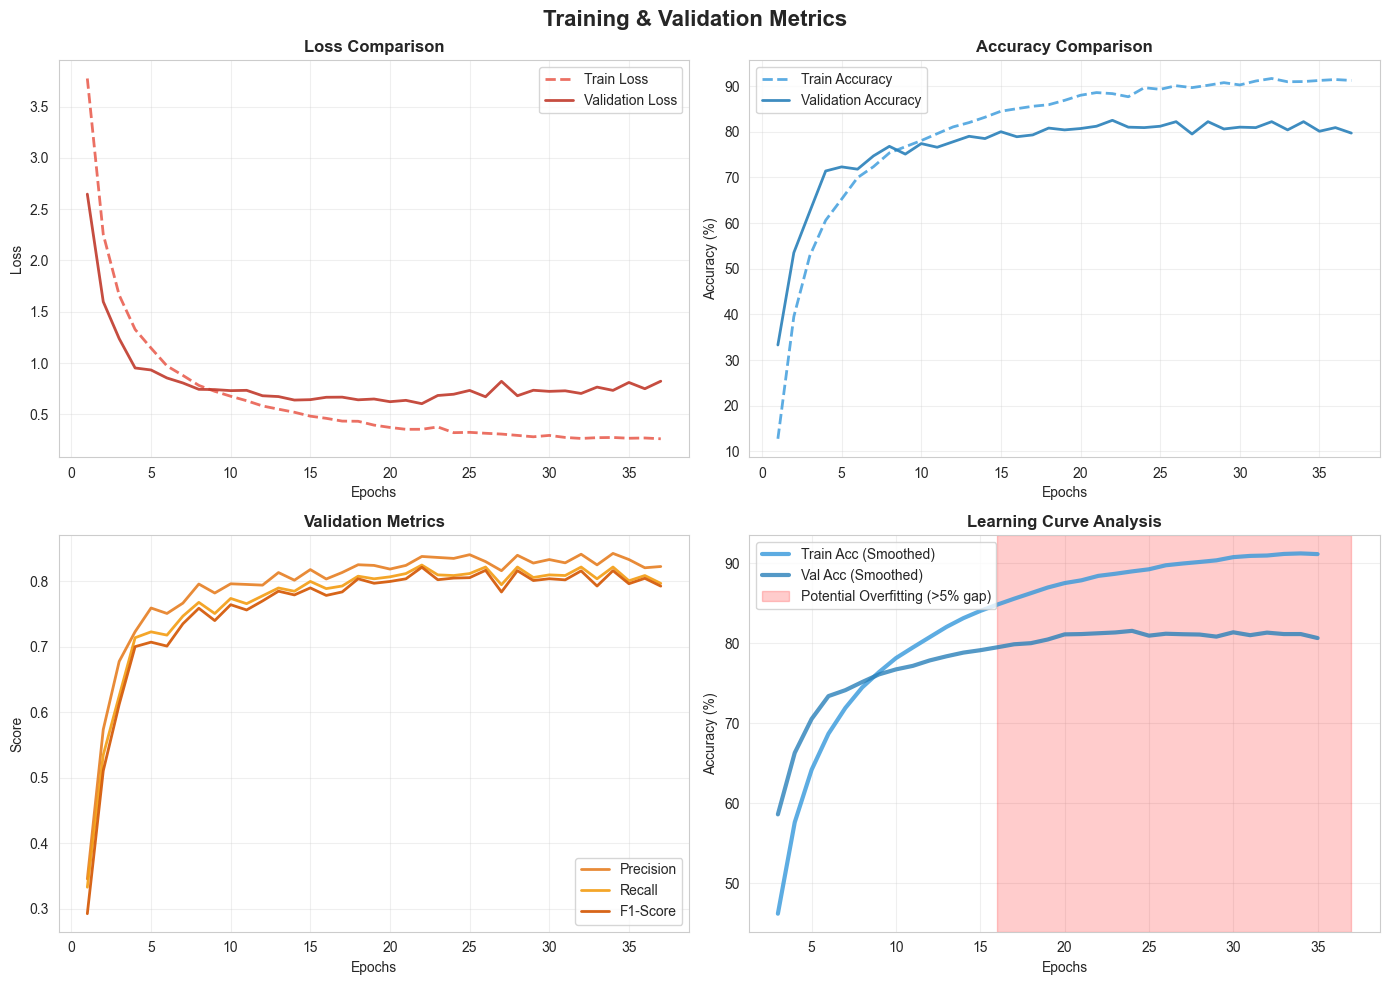

In [27]:
history_convnext = utils.load_training_history("model_convnext/training_history_convnext.json")
utils.plot_training_metrics(history_convnext)

## 📊 Interpretación - Modelo ConvNeXt-Base

#### 🔹 Pérdida (Loss)
Durante las primeras épocas, el modelo ConvNeXt-Base mostró una disminución rápida y sostenida en la pérdida de entrenamiento y validación. Sin embargo, a partir de la epoch **15**, la pérdida de validación comenzó a estabilizarse e incluso a oscilar ligeramente, indicando un **posible inicio de sobreajuste**. En contraste, la pérdida de entrenamiento continuó disminuyendo de manera constante, lo que refuerza esta interpretación.

#### 🔹 Exactitud (Accuracy)
La exactitud en entrenamiento creció de forma continua hasta superar el **90%**, mientras que la exactitud de validación se estabilizó alrededor del **82%**. La diferencia entre ambas métricas comenzó a superar el umbral del **5% a partir de la epoch 15**, como se muestra claramente en la región sombreada del gráfico inferior derecho (Learning Curve Analysis).

#### 🔹 Métricas de Validación
Las métricas de validación (precision, recall y F1-score) siguieron una evolución saludable hasta aproximadamente la **epoch 20**, alcanzando valores estables entre **0.80 y 0.83**. Después de ese punto, estas métricas se mantuvieron sin mejoras significativas, lo que sugiere que el modelo **dejó de aprender patrones nuevos** del conjunto de validación.

#### 🔹 Curva de Aprendizaje (Smoothed)
La curva de aprendizaje suavizada evidencia un **gap creciente** entre `train_acc` y `val_acc` a partir de la epoch **15**, que se mantiene hasta el final del entrenamiento registrado (~epoch 36). La zona marcada como **"Potential Overfitting (>5% gap)"** es consistente con la definición usada por el script de entrenamiento.


### ✅ Conclusión

El modelo **ConvNeXt-Base** muestra una capacidad de aprendizaje elevada y alcanza resultados sólidos en validación (~82% de accuracy y ~0.82 de F1-score). Sin embargo, el entrenamiento evidencia **un sobreajuste a partir de la epoch 15**, donde el modelo sigue optimizándose en el conjunto de entrenamiento pero ya no mejora en validación.

Dado que se utilizó fine-tuning completo (`freeze_backbone = False`) sobre toda la arquitectura ConvNeXt, y considerando el tamaño del dataset (~100,000 imágenes), este comportamiento es **esperado y controlable**.


### 🛠️ Recomendaciones

- **Aplicar early stopping** entre las épocas **15–20** (el script ya lo contempla con `patience=15` y `min_delta=0.1`).
- **Aumentar la regularización** mediante:
  - `weight_decay` más alto
  - `Dropout` adicional en la capa clasificadora (si fuera posible)
- Evaluar si vale la pena **congelar parcialmente el backbone** en las primeras capas para evitar sobreajuste temprano.

### 📋 Comparativa de Modelos Entrenados

| Modelo         | Accuracy Val. (%) | F1-Score Val. | Epoch de Overfitting | Comentarios                                    |
|----------------|-------------------|---------------|-----------------------|-----------------------------------------------------|
| ResNet18       | ~70               | ~0.70         | ~40                   | Modelo ligero, buena base, pero limitada capacidad  |
| ResNet50       | ~74               | ~0.75         | ~30–35                | Mejor generalización que ResNet18, más capacidad    |
| ResNet101      | ~75               | ~0.78         | ~34                   | Precisión sólida, pero riesgo alto de sobreajuste   |
| ConvNeXt-Base  | ~82               | ~0.82         | ~15                   | Excelente rendimiento, pero comienza a sobreajustar temprano |